# Bar charts

The barchart module (`fed3.plot.barchart.py`) creates bar plots from FED3 data. Some example bar plots are demonstrated below.  We will start by loading fed3 and some data:

In [1]:
import fed3
import fed3.plot as fplot

feds = fed3.load_examples('fr1', deduplicate_index='offset', offset='1s')

Some basic plotting parameters are also set for the purposes of documentation:

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [4, 5]
plt.rcParams['figure.dpi'] = 100

## Basic bar charts

The simplest bar plots show a value of interest (`y`) for one or more FEDFrames.  This defaults to being a measure of pellets earned:

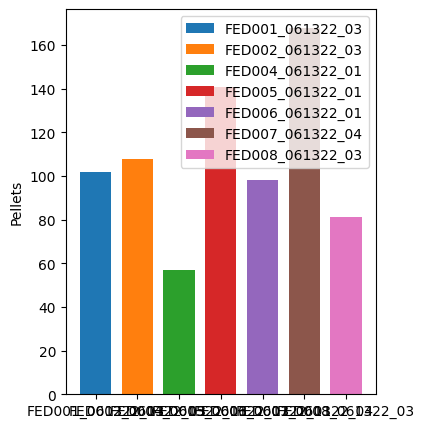

In [3]:
fig = fplot.bar(feds)

Commands from matplotlib can be used to clean up the figure:

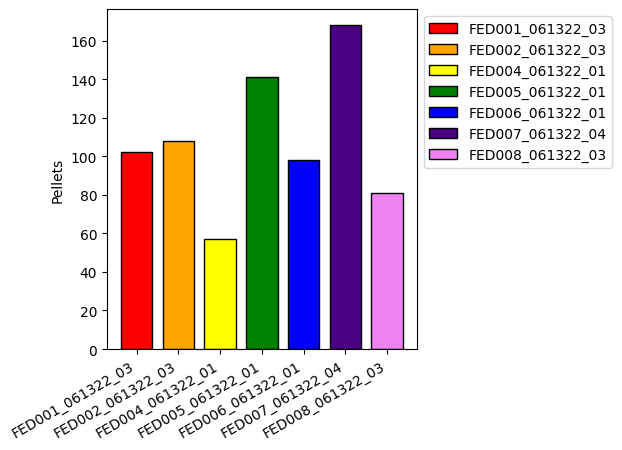

In [4]:
# define some custom colors
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet']

# replot, removing the legend so it can be explicitly placed
# note that fplot.argh is used to distribute the colors to each bar
fig = fplot.bar(feds, legend=False, color=fplot.argh(colors), edgecolor='black')
plt.legend(bbox_to_anchor=[1, 1, 0, 0])

# nice command for formatting xticks
fig.autofmt_xdate()

The value plotted for individual bars is based on three parameters:
- `y`: The metric being plotted, such as 'pellets' or 'left_pokes' or 'retrieval_time'.  See `fed3.metrics` for all the options.
- `stat`: This determines how the timeseries metrics are collapsed into a single point value.  The default is 'max', other typical options would be 'mean' or 'median'.
- `normalize`: A time delta can be provided to normalize the values so they are on a per-unit-time scale.  This can be useful when FEDs are recorded for different lengths of time.

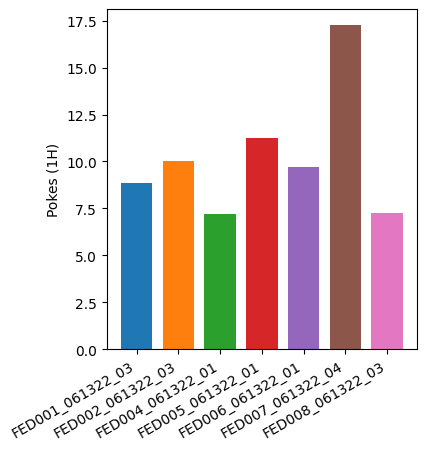

In [5]:
# pokes are normalize to be per hour
fig = fplot.bar(feds, y='pokes', normalize='1H', legend=False)
fig.autofmt_xdate()
plt.show()

### Positioning bars

There is a basic syntax for grouping the positions of bars together.  This is somewhat limited, but should be usable for many simple bar plots.  The primary argument is `positions`.  This argument accepts a list with one integer for each bar being plotted - bars receiving the same integer will be placed side-by-side:

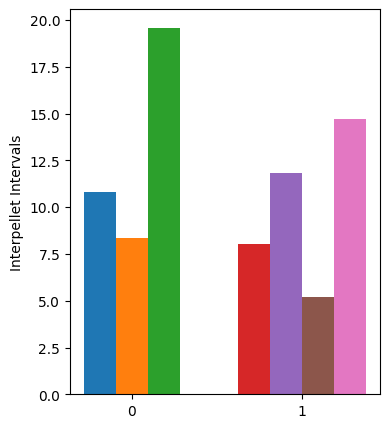

In [6]:
positions = [0, 0, 0, 1, 1, 1, 1]

fig = fplot.bar(feds, y='ipi', stat='mean', positions=positions, legend=False)
plt.show()

There is also a `position_labels` function which can be used to label each group:

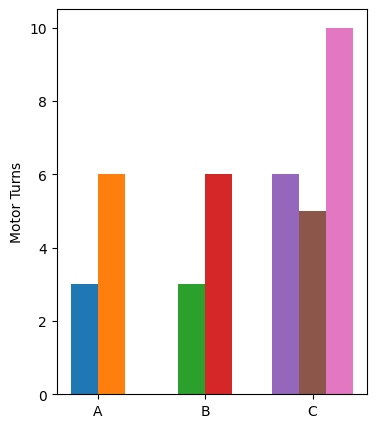

In [7]:
positions = [0, 0, 1, 1, 2, 2, 2]
position_labels = ['A', 'B', 'C']

fig = fplot.bar(feds,y='motor', stat='max',
                positions=positions,
                position_labels=position_labels,
                legend=False)
plt.show()

## Grouping data

Dictionaries can be used to place FEDFrames into named groups.  In this case, their data are aggregated into a single bar:

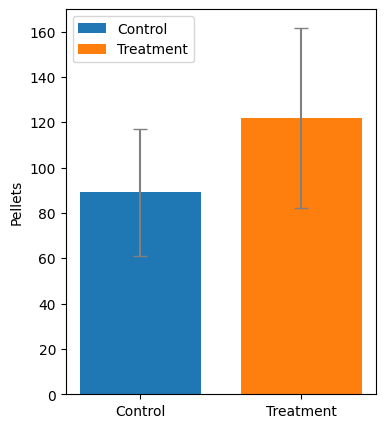

In [8]:
grouped = {'Control': feds[:3], 'Treatment': feds[3:]}

fig = fplot.bar(grouped, y='pellets', stat='max')

A few extra arguments control the grouping of data.  `agg` determines the function for aggregating the point values computed for each FEDFrame in the group, while `var` determines the metric to include in the error bars.

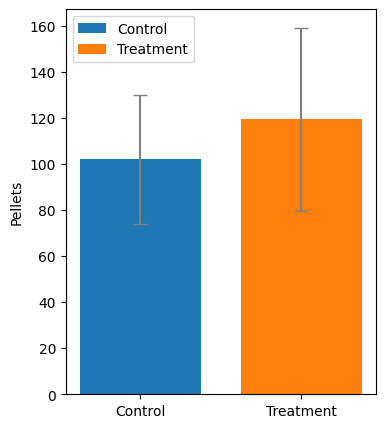

In [9]:
fig = fplot.bar(grouped, y='pellets', stat='max', agg='median')
plt.show()

Note the difference between `stat` and `agg`: `stat` determines how a time series metric derived from each FEDFrame is converted into a single value, while `agg` determines how those single values are converted into a single bar.  `agg` is only relevant when grouping data.

Instead of (or in addition to) the error bars, the `show_individual` argument can plot each FEDFrame's datum as a single point floating around the bar (with a little random jitter, as determined by `spread`):

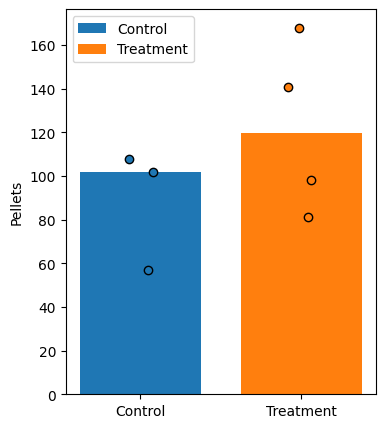

In [10]:
fig = fplot.bar(grouped, y='pellets', stat='max', agg='median', var=None, show_individual=True)
plt.show()

The `positions` argument can also be used to control the placement of grouped data:

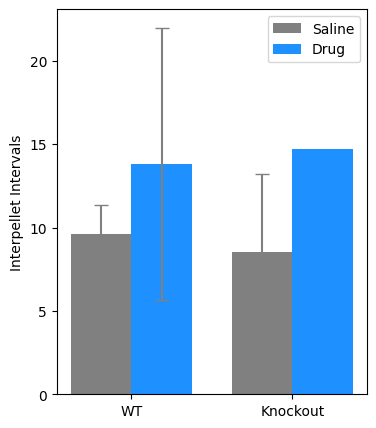

In [11]:
# this uses a trick:
# labels starting with an underscore are not included in the legend by matplotlib
groups2 = {'Saline': feds[0:2], 'Drug': feds[2:4], '_Saline': feds[4:6], '_Drug': feds[6:]}
positions = [0, 0, 1, 1]
colors = ['gray', 'dodgerblue'] * 2

fig = fplot.bar(groups2,
                y='ipi',
                stat='mean',
                positions=positions,
                position_labels=['WT', 'Knockout'],
                color=fplot.argh(colors))
plt.show()